In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from monetio.models import hysplit

In [3]:
from monetio.models import hysplit

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [4]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
from utilvolc import ashapp

In [5]:
from utilvolc.ashapp import ashinverse

In [7]:
os.chdir('/hysplit-users/alicec/projects/bezy/notebooks/')
projdir = os.getcwd().replace('notebooks','')

vloc = [160.587,55.978]
tag ='M'
ens = ['gep{:02d}'.format(x) for x in np.arange(1,31)]
ens.append('gec00')
#ens=['gep04','gep03']

#----------------------------------------------------------------
# locations and names of netcdf files with cdump output.
tdir = os.path.join(projdir,'data')
fnamelist  = ['xrfile.invbezy{}_{}.nc'.format(tag,x) for x in ens]
tdirlist = [tdir for x in ens]

#----------------------------------------------------------------
configdir = os.path.join(projdir,'RunM')
configfile = 'config.invbezy{}.txt'.format(tag)

#-----------------------------------------------------------------
# location of volcat files
vdir = os.path.join(projdir,'data','volcat')
# volcano id to locate
vid = 'v300250'
#-----------------------------------------------------------------
# Location of inverse algorithm output
#wpath = os.getcwd()
wdir = os.path.join(projdir,'RunM')
#print(wpath)
#cdir = '../Run{}/'.format(tag)
#wdir = '../Run{}/'.format(tag,tag)
#sdir = os.path.join(wdir,'RunM_1_2_3_4_TF')
name = 'out.dat'
name2 = 'out2.dat'
#------------------------------------------------------------------

# name to write emit-times file to.
emit_file_name = '{}emit_Run{}4.txt'.format(wdir,tag)
tcm_name_base = 'run{}zzz.tcm.txt'.format(tag)
figbase = 'Run{}4'.format(tag)

#-------------------------------------------------------------------
#

execdir = os.path.join(projdir,'Inverse_240')
hysplitdir = os.path.join(projdir,'hysplit')
#execdir = mdir+'/Inverse_'
print(execdir, hysplitdir)
print(vdir)
#

datadir = os.path.join(projdir, 'data')

/hysplit-users/alicec/projects/bezy/Inverse_240 /hysplit-users/alicec/projects/bezy/hysplit
/hysplit-users/alicec/projects/bezy/data/volcat


In [8]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,21,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,16):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 22, 12, 0), datetime.datetime(2020, 10, 22, 13, 0)]


In [9]:
# initiate the InverseAshEns object
%autoreload
inverse = ai.InverseAshEns(tdirlist,fnamelist,vdir,vid,configdir=configdir,configfile=configfile,verbose=False)
print('done')

done


In [11]:
inverse.invlist[13].cdump.ens.values

array(['102119_2880', '102119_3880', '102119_4880', '102119_5880',
       '102119_6880', '102119_7880', '102119_8880', '102119_9880',
       '102119_10880', '102119_11880', '102120_2880', '102120_3880',
       '102120_4880', '102120_5880', '102120_6880', '102120_7880',
       '102120_8880', '102120_9880', '102120_10880', '102120_11880',
       '102121_2880', '102121_3880', '102121_4880', '102121_5880',
       '102121_6880', '102121_7880', '102121_8880', '102121_9880',
       '102121_10880', '102121_11880', '102122_2880', '102122_3880',
       '102122_4880', '102122_5880', '102122_6880', '102122_7880',
       '102122_8880', '102122_9880', '102122_10880', '102122_11880',
       '102123_2880', '102123_3880', '102123_4880', '102123_5880',
       '102123_6880', '102123_7880', '102123_8880', '102123_9880',
       '102123_10880', '102123_11880', '102200_2880', '102200_3880',
       '102200_4880', '102200_5880', '102200_6880', '102200_7880',
       '102200_8880', '102200_9880', '102200_10880',

In [12]:
%autoreload
inverse.set_directory(wdir,execdir,datadir,hysplitdir)
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunM
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunM
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [13]:
# add in the relavant VOLCAT observations
%autoreload
#dlist = [[datetime.datetime(2020,10,22,9),datetime.datetime(2020,10,22,10)]]
for drange in dlist:
    print(drange)
    inverse.prepare_one_time(drange)

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 21, 23, 0), datetime.datetime(2020, 10, 22, 0, 0)]
[datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 22, 1, 0)]
[datetime.datetime(2020, 10, 22, 1, 0), datetime.datetime(2020, 10, 22, 2, 0)]
[datetime.datetime(2020, 10, 22, 2, 0), datetime.datetime(2020, 10, 22, 3, 0)]
[datetime.datetime(2020, 10, 22, 3, 0), datetime.datetime(2020, 10, 22, 4, 0)]
[datetime.datetime(2020, 10, 22, 4, 0), datetime.datetime(2020, 10, 22, 5, 0)]
[datetime.datetime(2020, 10, 22, 5, 0), datetime.datetime(2020, 10, 22, 6, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]
[datetime.datetime(2020, 10, 22, 7, 0), datetime.datetime(2020, 10, 22, 8, 0)]
[datetime.datetime(2020, 10, 22, 8, 0), datetime.datetime(2020, 10, 22, 9, 0)]
[datetime.datetime(2020, 10, 22, 9, 0), datetim

In [14]:
%autoreload
inverse.invlist[0].print_summary()

Observations availalbe in volcat_avg_hash
dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
times in cdump file
2020 10 21 19:00z
2020 10 21 20:00z
2020 10 21 21:00z
2020 10 21 22:00z
2020 10 21 23:00z
2020 10 22 00:00z
2020 10 22 01:00z
2020 10 22 02:00z
2020 10 22 03:00z
2020 10 22 04:00z
2020 10 22 05:00z
2020 10 22 06:00z
2020 10 22 07:00z
2020 10 22 08:00z
2020 10 22 09:00z
2020 10 22 10:00z
2020 10 22 11:00z
2020 10 22 12:00z


12 gep01
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


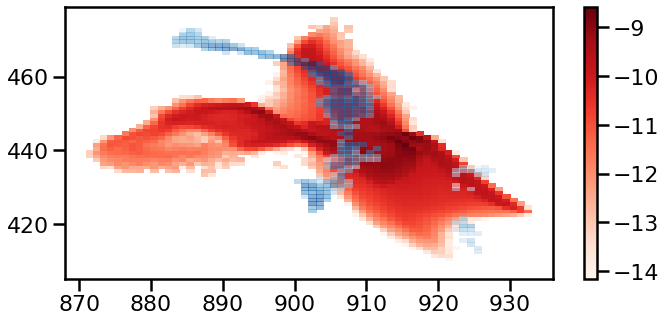

12 gep02
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


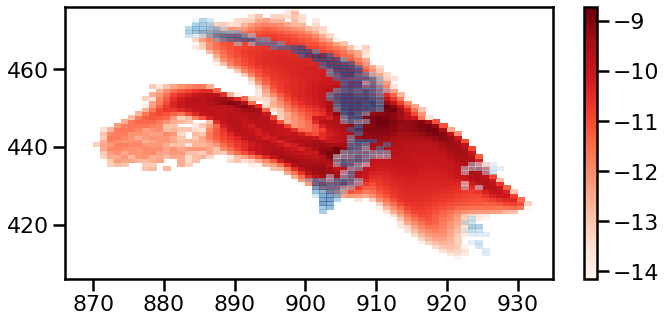

12 gep03
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


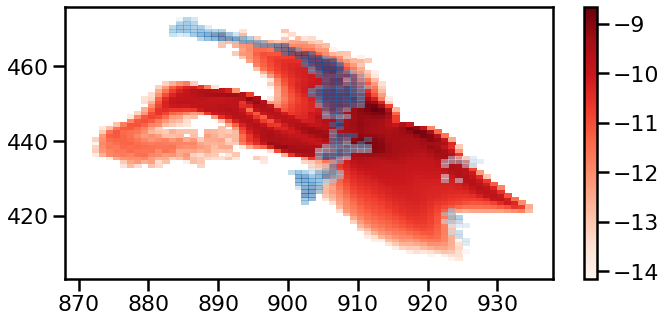

12 gep04
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


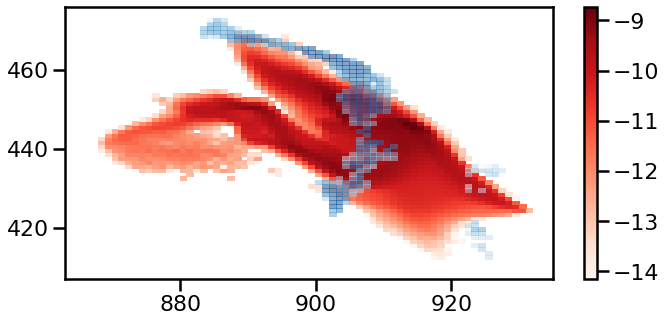

12 gep05
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


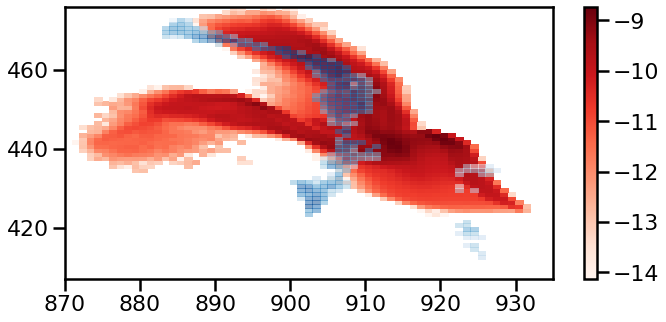

12 gep06
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


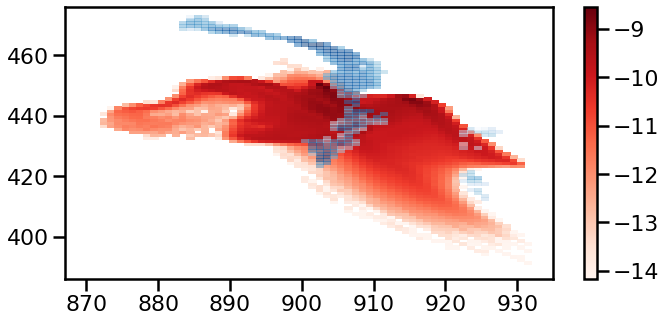

12 gep07
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


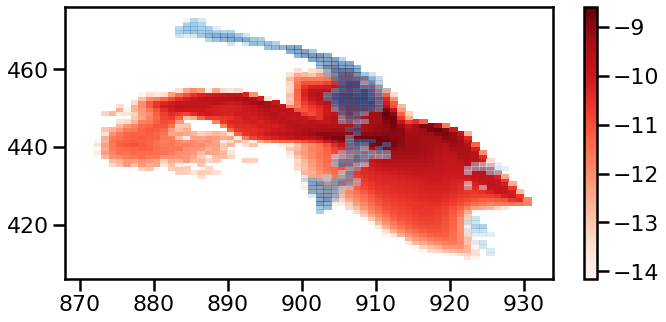

12 gep08
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


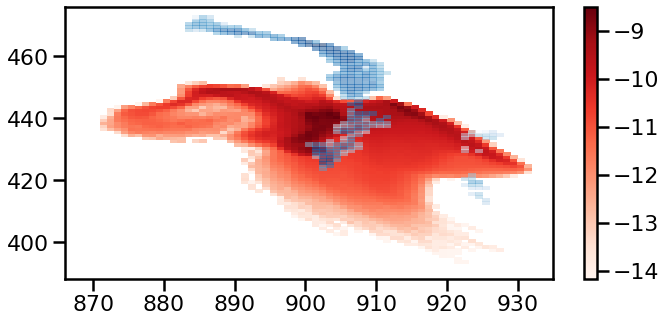

12 gep09
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


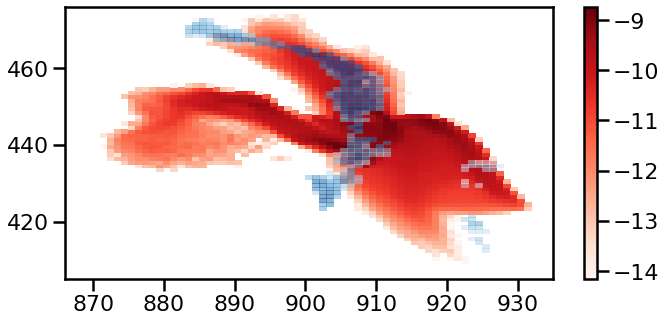

12 gep10
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


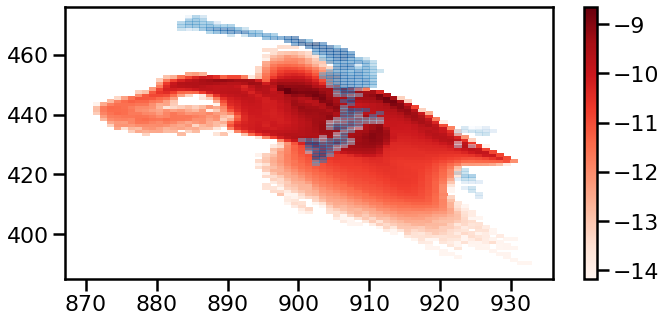

12 gep11
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


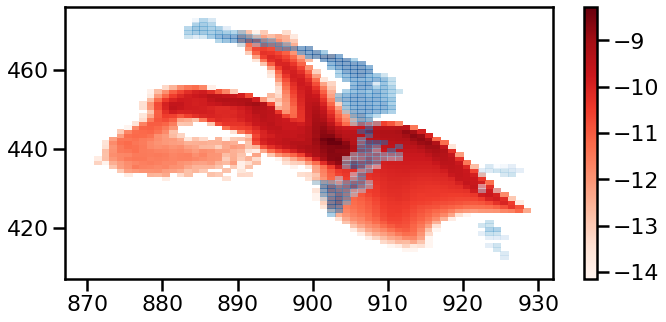

12 gep12
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


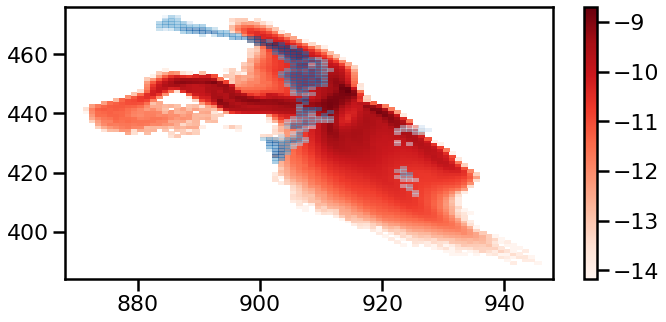

12 gep13
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


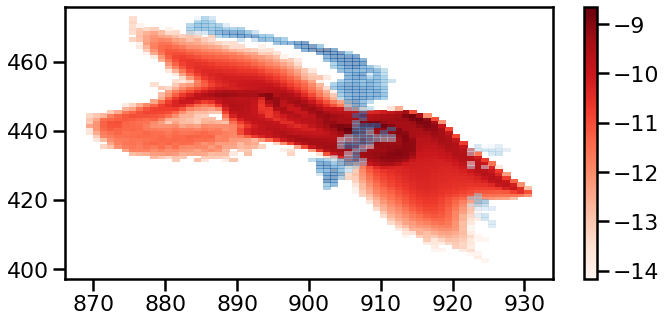

12 gep14
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


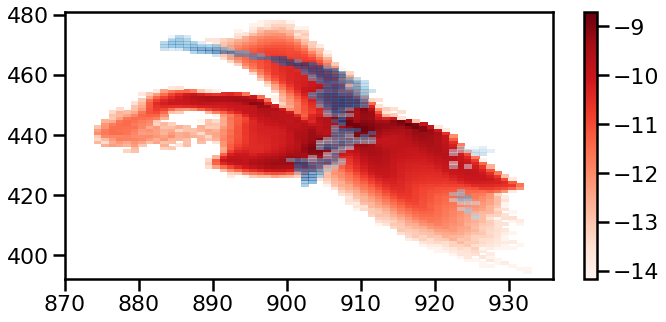

12 gep15
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


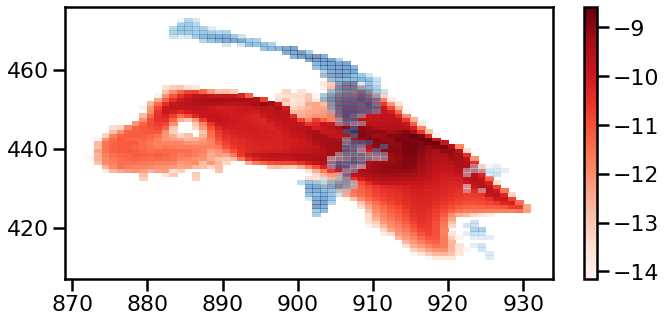

12 gep16
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


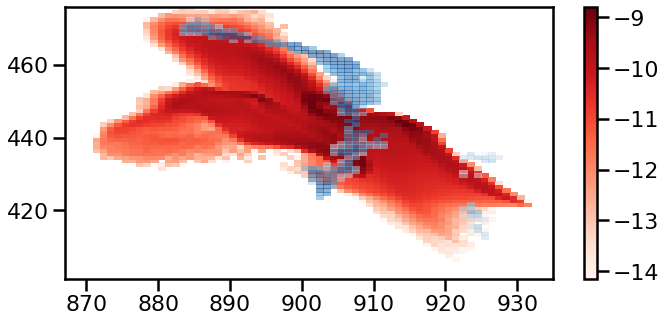

12 gep17
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


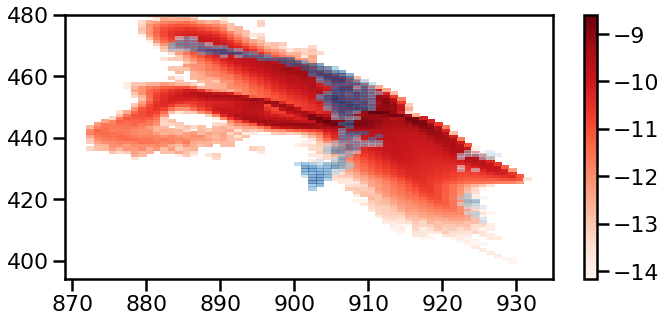

12 gep18
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


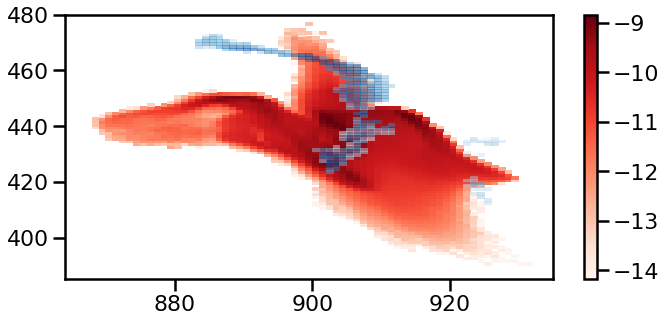

12 gep19
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


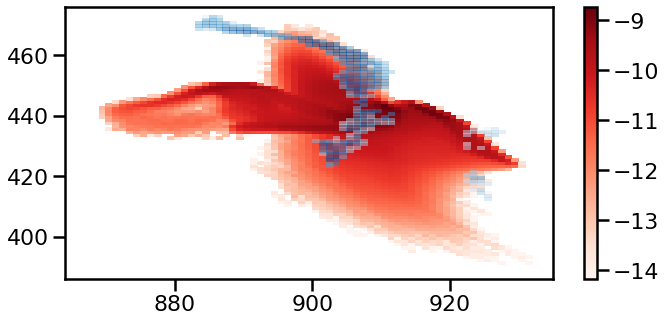

12 gep20
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


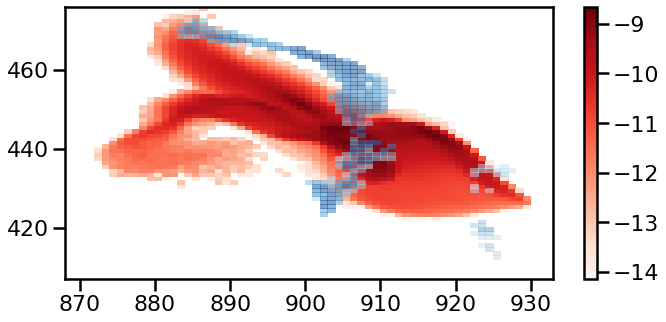

12 gep21
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


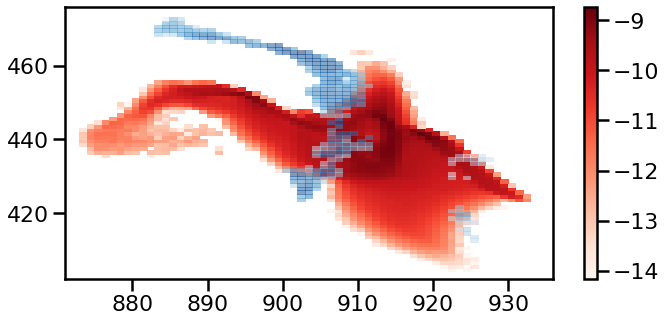

12 gep22
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


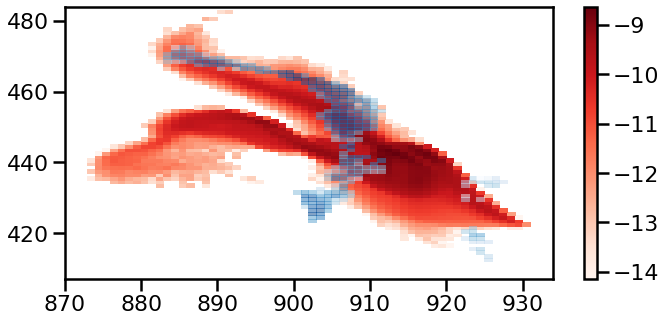

12 gep23
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


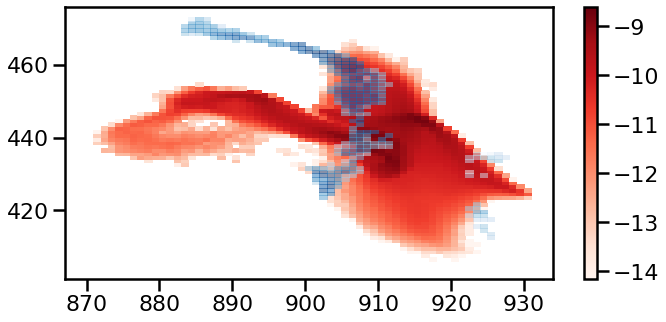

12 gep24
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


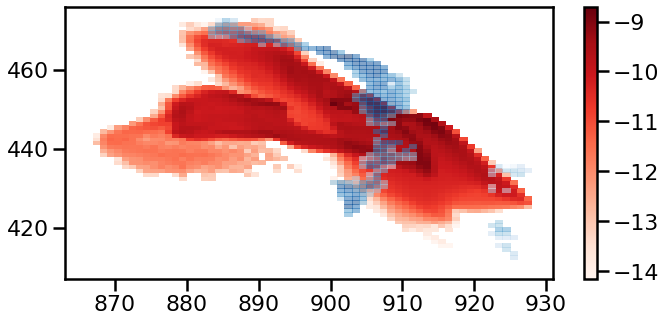

12 gep25
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


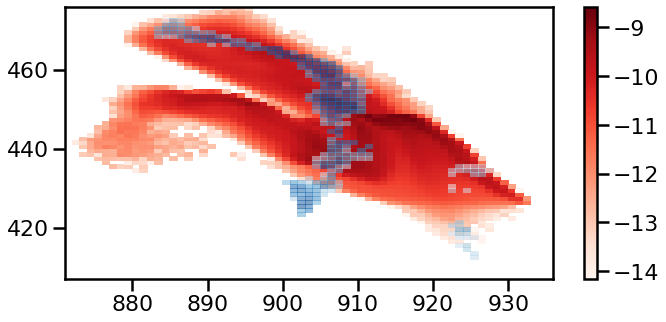

12 gep26
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


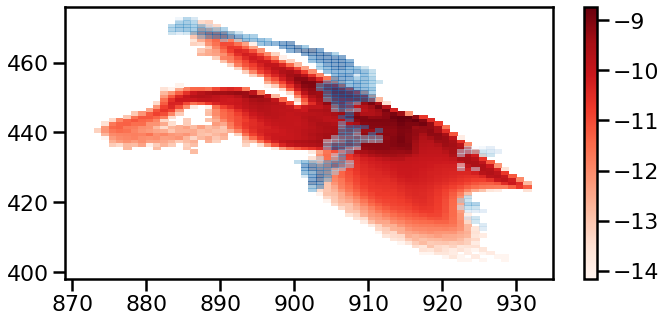

12 gep27
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


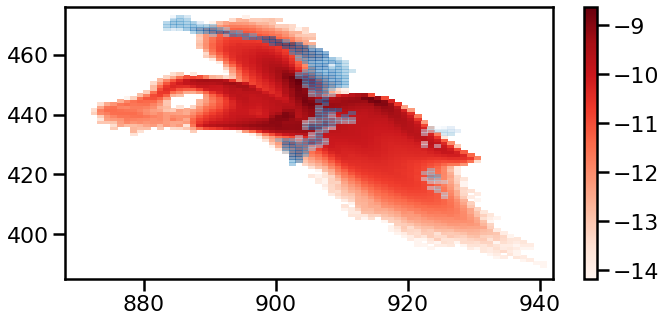

12 gep28
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


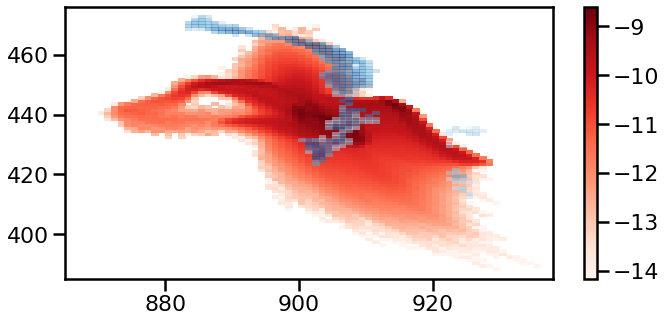

12 gep29
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


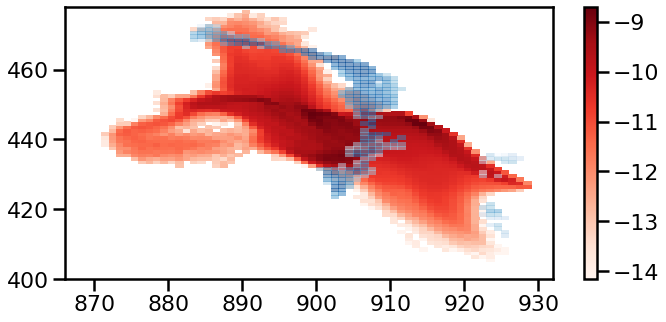

12 gep30
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


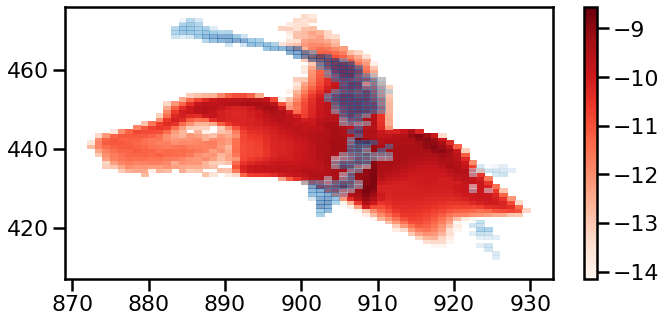

12 gec00
tii 12


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


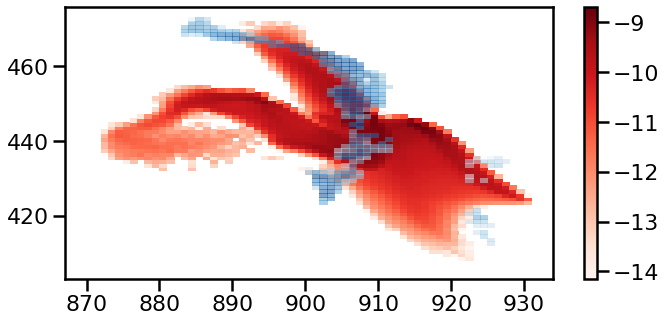

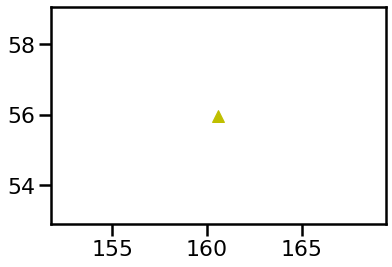

In [18]:
%autoreload
#gep10, gep16 looks good at tii=6.
#gep24 possibly looks ok.
zlevel=None  #index of vertical level to show.
           # if None then sum along the z index.
#zlevel=20
tii=12
%autoreload
clist =[]
clist = inverse.compare_plotsA(daterange=dlist[0],tii=tii,zii=zlevel,vloc=None)
plt.plot(160.587,55.978,'y^')


In [16]:
%autoreload
inverse.set_concmult(1)

In [20]:
def makerun(tii,remove_cols, remove_rows, remove_sources,remove_ncs):
    print("HERE HERE HERE")
    inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
    runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    inverse.set_subdirectory(runtag)
    print('HERE', inverse.subdir)
    tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
    inverse.run_tcm()
    
    eii=None
    unit='g/h'
    unit='kg/s'
    inverse.plot_outdat_ts(eii,unit=unit)
    #plt.show()
    #inverse.plot_outdat_ts(eii,profile=True)
    inverse.save_emis(runtag+'.csv')


In [44]:
%autoreload
configdir='/hysplit-users/alicec/projects/bezy/RunM/'
configfile = 'config.invbezyM.txt'
inverse.add_config_info(configdir, configfile)

In [45]:
inverse.invlist[0].cdump.ens.values

array(['102119_2880', '102119_3880', '102119_4880', '102119_5880',
       '102119_6880', '102119_7880', '102119_8880', '102119_9880',
       '102119_10880', '102119_11880', '102120_2880', '102120_3880',
       '102120_4880', '102120_5880', '102120_6880', '102120_7880',
       '102120_8880', '102120_9880', '102120_10880', '102120_11880',
       '102121_2880', '102121_3880', '102121_4880', '102121_5880',
       '102121_6880', '102121_7880', '102121_8880', '102121_9880',
       '102121_10880', '102121_11880', '102122_2880', '102122_3880',
       '102122_4880', '102122_5880', '102122_6880', '102122_7880',
       '102122_8880', '102122_9880', '102122_10880', '102122_11880',
       '102123_2880', '102123_3880', '102123_4880', '102123_5880',
       '102123_6880', '102123_7880', '102123_8880', '102123_9880',
       '102123_10880', '102123_11880', '102200_2880', '102200_3880',
       '102200_4880', '102200_5880', '102200_6880', '102200_7880',
       '102200_8880', '102200_9880', '102200_10880',

In [46]:
inverse.invlist[0].sourcehash.keys()

dict_keys(['102119_2880', '102119_3880', '102119_4880', '102119_5880', '102119_6880', '102119_7880', '102119_8880', '102119_9880', '102119_10880', '102119_11880', '102120_2880', '102120_3880', '102120_4880', '102120_5880', '102120_6880', '102120_7880', '102120_8880', '102120_9880', '102120_10880', '102120_11880', '102121_2880', '102121_3880', '102121_4880', '102121_5880', '102121_6880', '102121_7880', '102121_8880', '102121_9880', '102121_10880', '102121_11880', '102122_2880', '102122_3880', '102122_4880', '102122_5880', '102122_6880', '102122_7880', '102122_8880', '102122_9880', '102122_10880', '102122_11880', '102123_2880', '102123_3880', '102123_4880', '102123_5880', '102123_6880', '102123_7880', '102123_8880', '102123_9880', '102123_10880', '102123_11880', '102200_2880', '102200_3880', '102200_4880', '102200_5880', '102200_6880', '102200_7880', '102200_8880', '102200_9880', '102200_10880', '102200_11880', '102201_2880', '102201_3880', '102201_4880', '102201_5880', '102201_6880', '1

tii [2, 3, 4, 5, 6, 7]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
20

/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:874: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:875: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:889: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21

gep01
gep02
gep03
gep04
gep05
gep06
gep07
gep08
gep09
gep10
gep11
gep12
gep13
gep14
gep15
gep16
gep17
gep18
gep19
gep20
gep21
gep22
gep23
gep24
gep25
gep26
gep27
gep28
gep29
gep30
gec00
saving to  /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/RunM_2_3_4_5_6_7_TFw5.csv
saving to  /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/RunM_2_3_4_5_6_7_TFw5.csv
saving to  /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/RunM_2_3_4_5_6_7_TFw5.csv
saving to  /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/RunM_2_3_4_5_6_7_TFw5.csv
saving to  /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/RunM_2_3_4_5_6_7_TFw5.csv
saving to  /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/RunM_2_3_4_5_6_7_TFw5.csv
saving to  /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/RunM_2_3_4_5_6_7_TFw5.csv
saving to  /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/RunM_2_3_4_5_6_7_TFw5.csv
saving to  /hy

GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep09 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t00z.gefs.gep09 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t06z.gefs.gep09 meteorological file does not exist
writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/gep10_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fc

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/gep21_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep21 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t00z.gefs.gep21 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t06z.gefs.gep21 meteorological file does not exist
writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_5_6_7_TFw5/gep22_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/al

running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep02
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep03
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep04
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep05
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep06
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep07
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep08
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep09
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep10
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep11
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep12
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep13
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep14
running  /hysplit-users/alicec/projects/bezy/hyspli

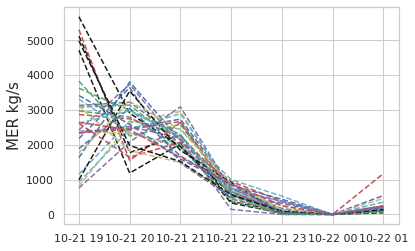

In [49]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.

%autoreload

tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
tiilist = [[2,3,4,5,6,7]]
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    print('tii', tii)
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    inverse.make_efile(vloc=vloc)
    inverse.run_hysplit()
    inverse.set_subdirectory(runtag)
    dset = inverse.create_emit_output('RunM4.nc')

In [26]:
%autoreload
tiilist = [2,3,4]  #times to assimilate in inversion algorithm.
remove_cols=True
remove_rows=False
remove_ncs=5
#remove_sources = None
remove_sources = None  # this would remove top vertical level from consideration.
#inverse.make_tcm_mult([1,2,3,4],remove_cols=True,remove_rows=False,remove_sources=['12880'])
inverse.make_tcm_mult(tiilist,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
runtag = ai.create_runtag(tag,tiilist,remove_cols, remove_rows, remove_sources,remove_ncs)

# set the subdirectory for this TCM run.
#subdir = inverse.set_sub_directory(runtag)
#print('setting subdirectory {}'.format(subdir))

2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21

In [27]:
print(runtag)

RunM_2_3_4_TFw5


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1029: RuntimeWarning: divide by zero encountered in log10
  cb = plt.pcolormesh(np.log10(self.tcm),cmap='tab20')


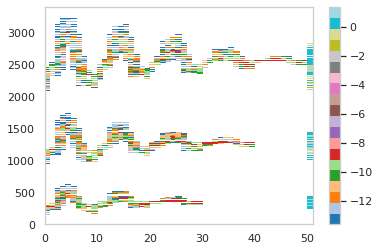

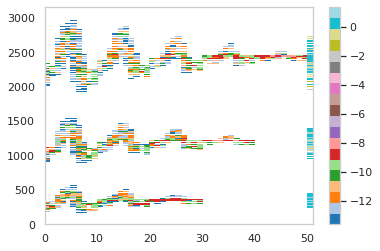

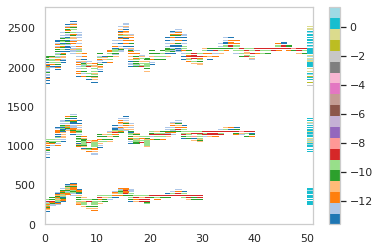

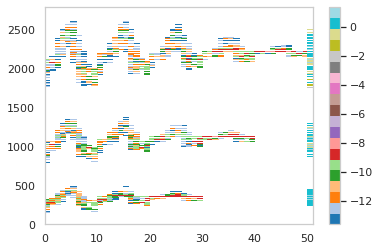

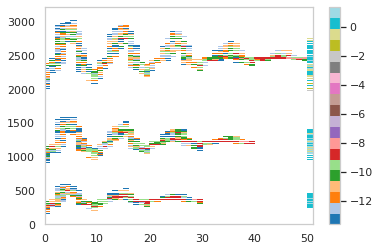

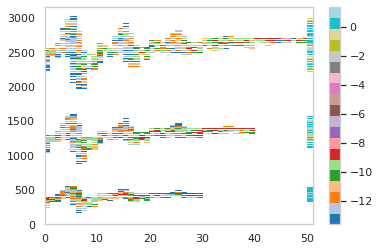

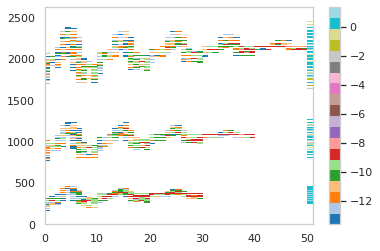

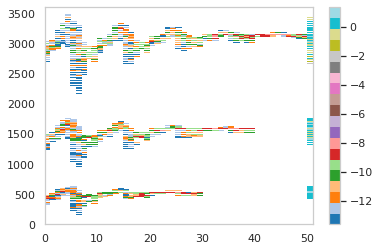

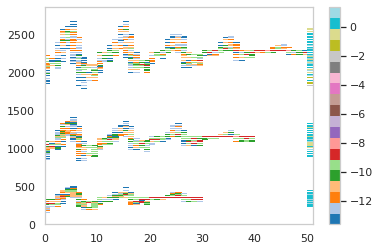

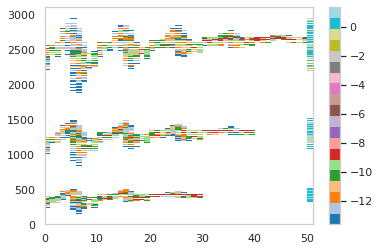

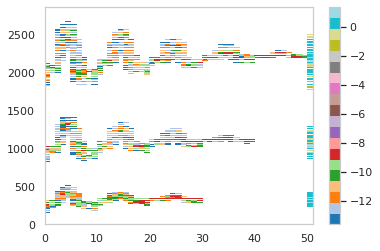

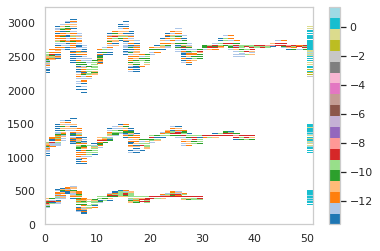

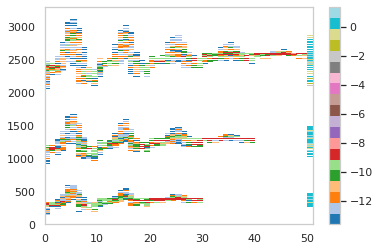

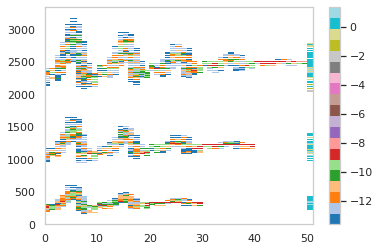

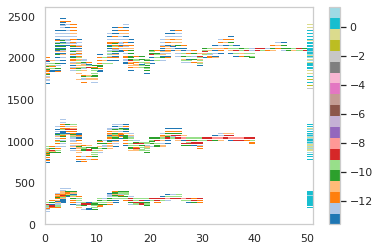

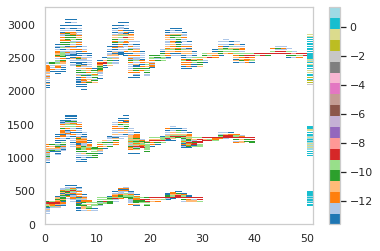

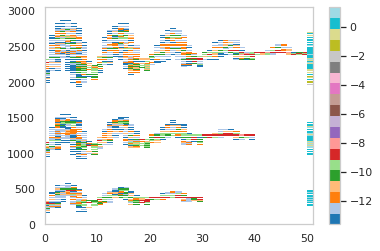

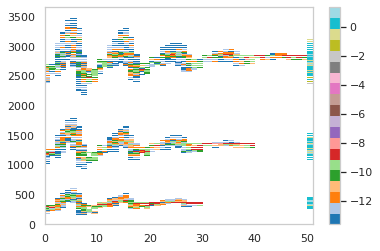

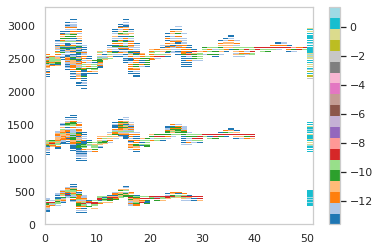

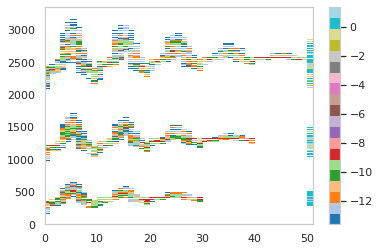

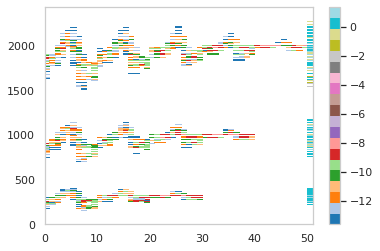

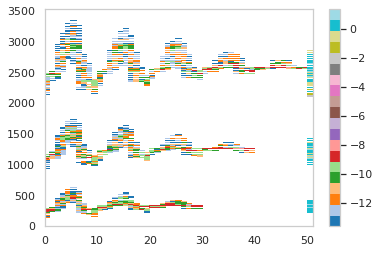

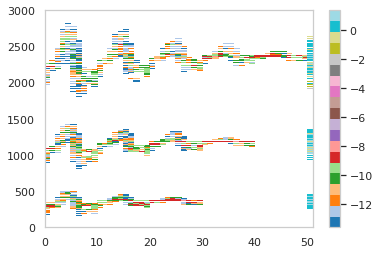

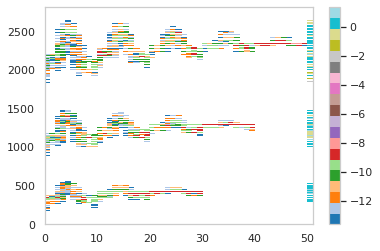

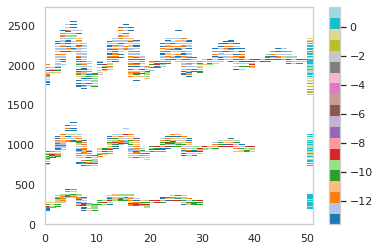

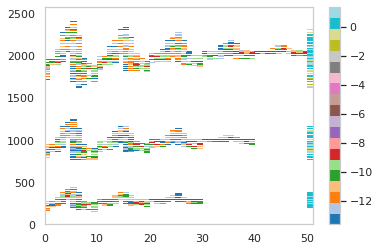

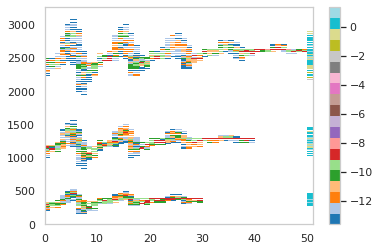

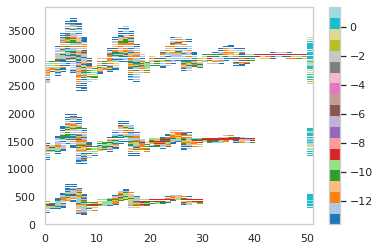

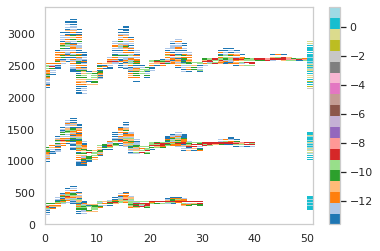

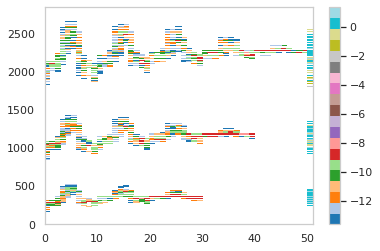

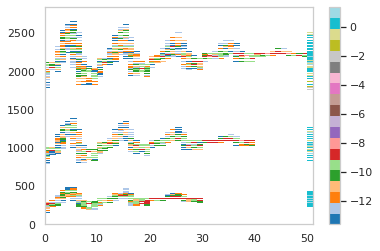

True

In [28]:
%autoreload
inverse.plot_tcm()



In [29]:
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.set_subdirectory(runtag)

'/hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TFw5'

In [74]:
%autoreload
tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
#print(tcmstr)

(5989, 61)
N_ctrl 60
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/runM4.tcm_gep01.txt
(7902, 61)
N_ctrl 60
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/runM4.tcm_gep02.txt
(6141, 61)
N_ctrl 60
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/runM4.tcm_gep03.txt
(8448, 61)
N_ctrl 60
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/runM4.tcm_gep04.txt
(5175, 61)
N_ctrl 60
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/runM4.tcm_gep05.txt
(5453, 61)
N_ctrl 60
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/runM4.tcm_gep06.txt
(6432, 61)
N_ctrl 60
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/runM4.tcm_gep07.txt
(6527, 61)
N_ctrl 60
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/runM4.tcm_gep08.txt
(5339, 61)
N_ctrl 60
output file /hysplit-users/alicec/projects/bezy/Run

In [75]:
%autoreload
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.run_tcm()

gep01
gep02
gep03
gep04
gep05
gep06
gep07
gep08
gep09
gep10
gep11
gep12
gep13
gep14
gep15
gep16
gep17
gep18
gep19
gep20
gep21
gep22
gep23
gep24
gep25
gep26
gep27
gep28
gep29
gep30
gec00


In [76]:
# Now run the inverse model.

# open the Parameters_in.dat file and set N_ctrl, Nx_ctrl and lbfgs_nbd to
# the number shown for N_ctrl above.

# copy the tcm file to TCM_sum.csv

# run new_lbfgsb.x

gep01


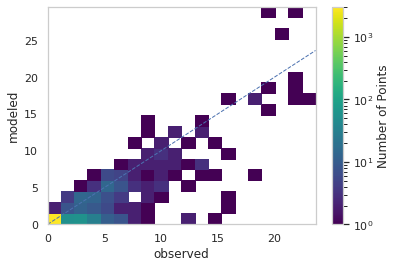

gep02


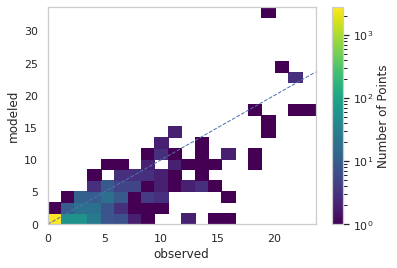

gep03


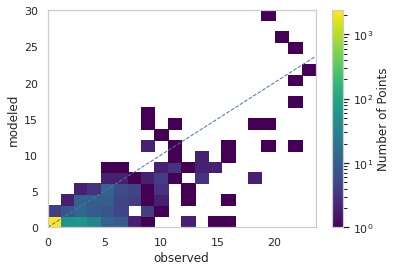

gep04


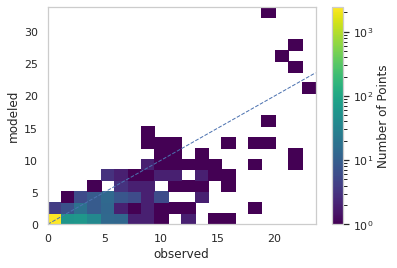

gep05


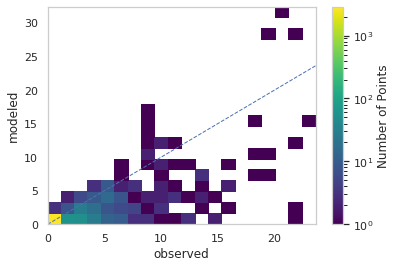

gep06


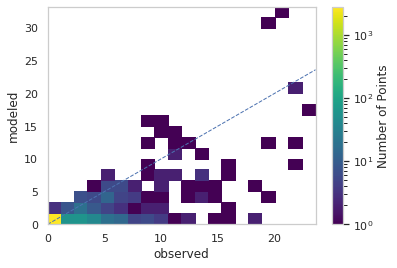

gep07


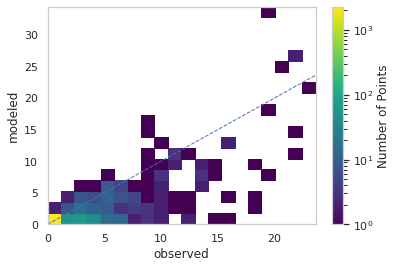

gep08


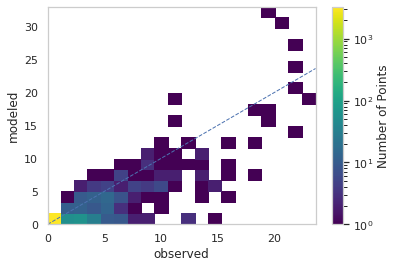

gep09


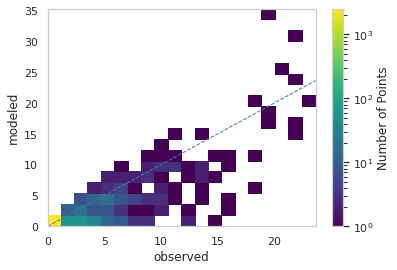

gep10


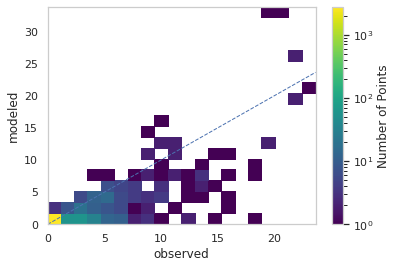

gep11


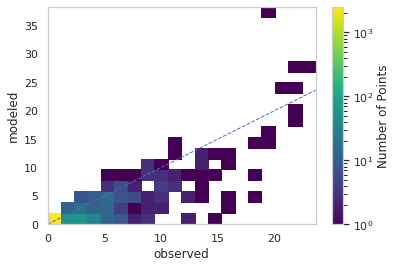

gep12


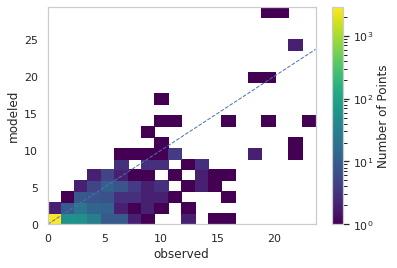

gep13


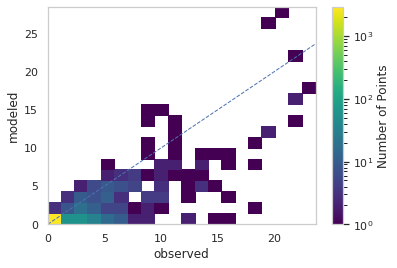

gep14


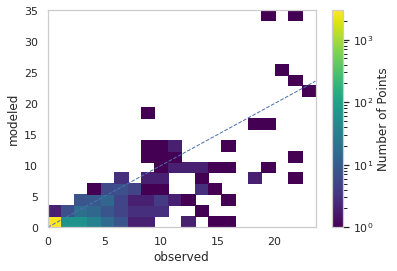

gep15


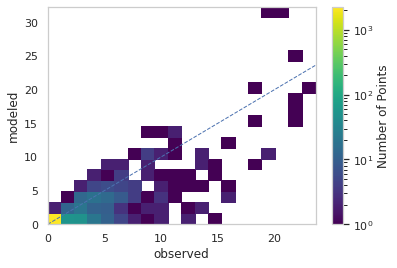

gep16


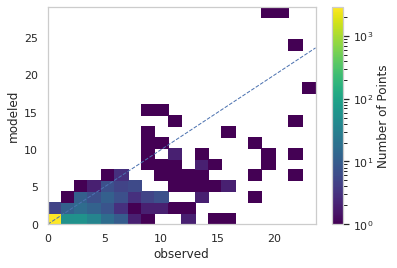

gep17


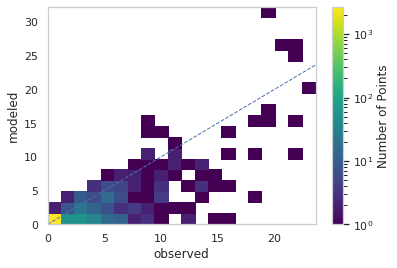

gep18


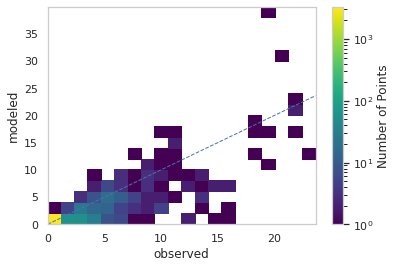

gep19


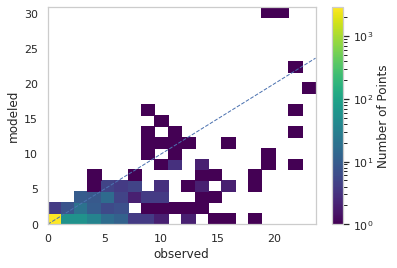

gep20


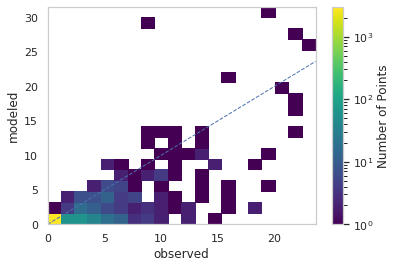

gep21


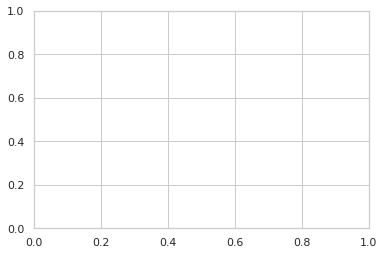

gep22


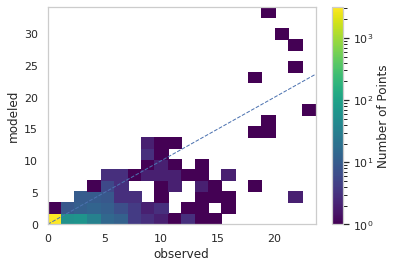

gep23


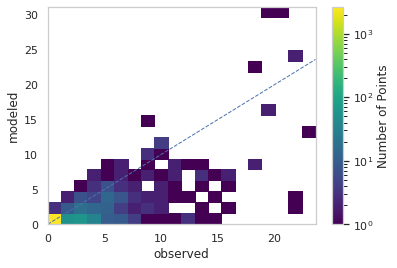

gep24


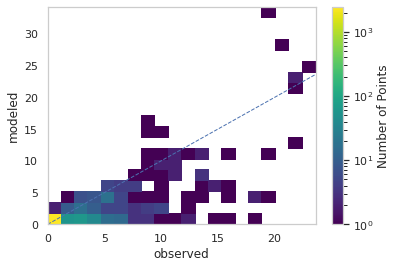

gep25


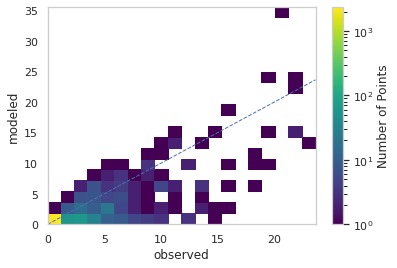

gep26


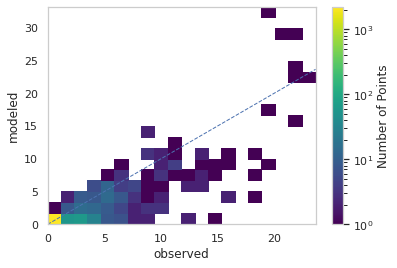

gep27


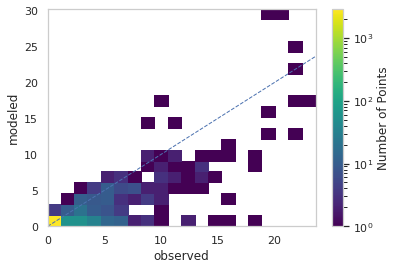

gep28


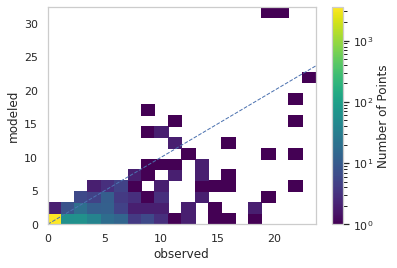

gep29


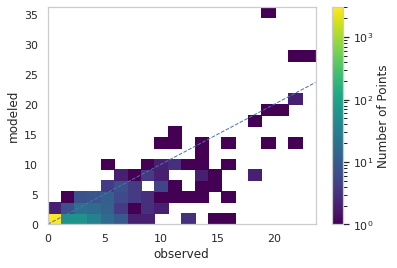

gep30


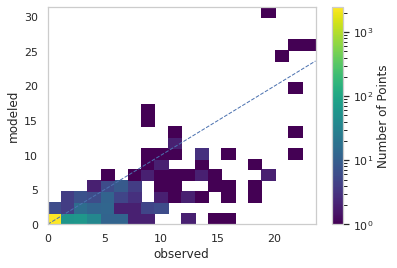

gec00


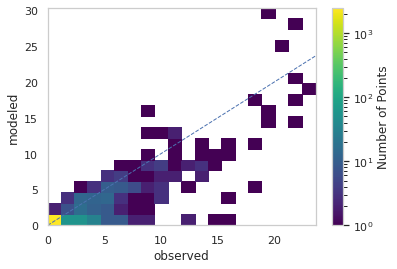

In [30]:
%autoreload
inverse.plot_outdat(eii=None)

Data assimilated over
2020-10-21 21:00:00
2020-10-21 22:00:00
2020-10-21 23:00:00


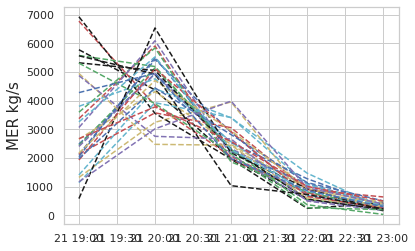

total 0.046376352530697086 Tg
total 0.04907941057389039 Tg
total 0.041529256409431434 Tg
total 0.038615047931944806 Tg
total 0.039329676328633434 Tg
total 0.03466265229266614 Tg
total 0.03968342677889483 Tg
total 0.04712405965315959 Tg
total 0.044140537067661204 Tg
total 0.04092548456497921 Tg
total 0.04434460943460376 Tg
total 0.0436235678058454 Tg
total 0.03820095845160885 Tg
total 0.04331743891813605 Tg
total 0.04822973310110212 Tg
total 0.036991898069587775 Tg
total 0.04031426997620207 Tg
total 0.04838341421024087 Tg
total 0.03569402389031641 Tg
total 0.03868639164526513 Tg
total 0.03936261282366897 Tg
total 0.03731918989055355 Tg
total 0.03905819432230299 Tg
total 0.039091811459783535 Tg
total 0.04247761054745569 Tg
total 0.04412860692141124 Tg
total 0.04010390193686296 Tg
total 0.03421321122923394 Tg
total 0.04483699521077846 Tg
total 0.03786140089333196 Tg
total 0.04446496906431958 Tg


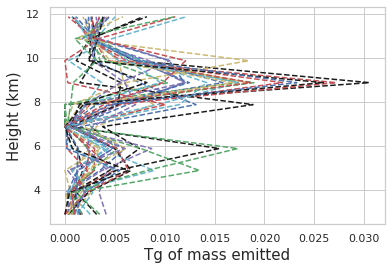

In [31]:
%autoreload
print('Data assimilated over')
for tii in tiilist:
    print(inverse.invlist[0].get_time(tii))
#eii=[14]
eii=None
unit='g/h'
unit='kg/s'
inverse.plot_outdat_ts(eii,unit=unit)
plt.show()
inverse.plot_outdat_ts(eii,unit=unit,profile=True)
#ax = plt.gca()
#ax.set_ylim(0,10000)

In [79]:
inverse.invlist[0].sourcehash

{'102119_2880': {'sdate': datetime.datetime(2020, 10, 21, 19, 0),
  'edate': datetime.datetime(2020, 10, 21, 20, 0),
  'bottom': 2880.0,
  'top': 3880.0},
 '102119_3880': {'sdate': datetime.datetime(2020, 10, 21, 19, 0),
  'edate': datetime.datetime(2020, 10, 21, 20, 0),
  'bottom': 3880.0,
  'top': 4880.0},
 '102119_4880': {'sdate': datetime.datetime(2020, 10, 21, 19, 0),
  'edate': datetime.datetime(2020, 10, 21, 20, 0),
  'bottom': 4880.0,
  'top': 5880.0},
 '102119_5880': {'sdate': datetime.datetime(2020, 10, 21, 19, 0),
  'edate': datetime.datetime(2020, 10, 21, 20, 0),
  'bottom': 5880.0,
  'top': 6880.0},
 '102119_6880': {'sdate': datetime.datetime(2020, 10, 21, 19, 0),
  'edate': datetime.datetime(2020, 10, 21, 20, 0),
  'bottom': 6880.0,
  'top': 7880.0},
 '102119_7880': {'sdate': datetime.datetime(2020, 10, 21, 19, 0),
  'edate': datetime.datetime(2020, 10, 21, 20, 0),
  'bottom': 7880.0,
  'top': 8880.0},
 '102119_8880': {'sdate': datetime.datetime(2020, 10, 21, 19, 0),
  'e

In [80]:
#%autoreload
#inverse.sourcehash = ai.get_sourcehash(configdir,configfile)

gep16


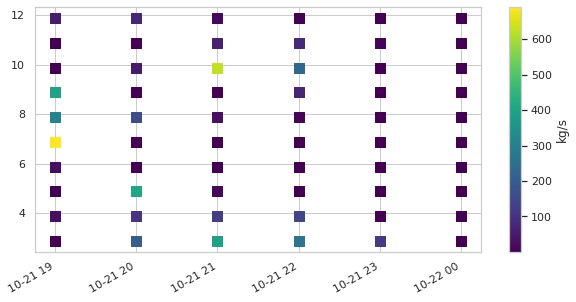

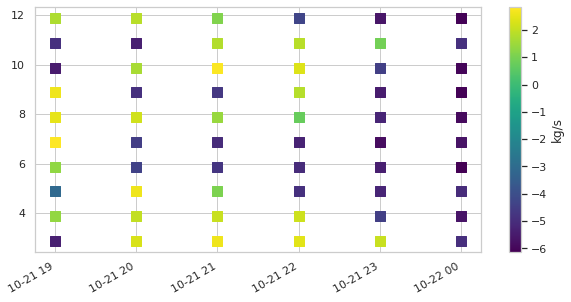

In [81]:
%autoreload
unit='kg/s'
#unit='g/h'
iii=15
print(inverse.taglist[iii])
ilist =  inverse.read_outdat()
df = ilist[iii].get_emis()
vals = inverse.invlist[iii].make_outdat(df)
inverse.invlist[iii].plot_outdat(vals,log=False,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions_log.png'.format(figbase))
plt.show()
inverse.invlist[0].plot_outdat(vals,log=True,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions.png'.format(figbase))


In [63]:
%autoreload
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunM
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF_12880
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [83]:
%autoreload
# creates emit-time:q
#s, CONTROL and SETUP files for HYSPLIT runs.
inverse.make_efile(vloc=vloc)

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/gep01_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep01 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep01 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep01 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep01 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t00z.gefs.gep01 meteorological file does not e

GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep06 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep06 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep06 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep06 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t00z.gefs.gep06 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t06z.gefs.gep06 met

GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep12 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep12 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep12 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep12 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t00z.gefs.gep12 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t06z.gefs.gep12 met

GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep18 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep18 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep18 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep18 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t00z.gefs.gep18 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t06z.gefs.gep18 met

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/gep24_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep24 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep24 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep24 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep24 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t00z.gefs.gep24 meteorological file does not e

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_4_5_6_TFw5_12880/gep30_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep30 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep30 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep30 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep30 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201023/hysplit.t00z.gefs.gep30 meteorological file does not e

In [84]:
%autoreload
inverse.run_hysplit()

running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep01
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep02
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep03
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep04
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep05
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep06
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep07
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep08
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep09
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep10
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep11
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep12
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep13
running  /hysplit-users/alicec/projects/bezy/hyspli

In [32]:
%autoreload
inverse.set_subdirectory(runtag)
dset = inverse.create_emit_output('RunM4.nc')

makeing file RunM4.nc


In [34]:
dset

<xarray.DataArray 'p060' (source: 1, ens: 31, time: 36, z: 9, y: 257, x: 436)>
array([[[[[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
...
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]]]]], dtype=float32)
Coordinates:
  * y          (y) int64 289 290 291 292 293 294 295 ... 540 541 542 543 544 545
  * x          (x) int64 852 853 854 855 856 857 ... 1283 1284 1285 1286 1287
  * time       (time) datetime64[ns] 2020-10-21T20:00:00 ... 2020-10-23T07:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715
  * ens        (ens) <U5 'gep01' 'gep02' 'gep03' ... 'gep29' 'gep30' 'gec00'
  * source     (source) <U2 'M4'
    latitude   (y, x) float64 39.78 39.78 39.78 39.78 ... 65.38 65.38 65.38
    longitude  (y, x) float64 155.7 155.8 155.9 156.0 ... 199.0 199.1 199.2
Attributes: (12/23)
    Species ID:                   ['p060']
    sample time hours:            0.0
    Starting Latitudes:           [55.978, 55.978, 55.978, 55.978, 55.978, 55...
    Starting Longitudes:          [160.587, 160.587, 160.587, 160.587, 160.58...
    Starting Heights:             [3880.0, 4880.0, 3880.0, 3880.0, 3880.0, 38...
    Source Date:                  ['20201021.190000', '20201021.190000', '202...
    ...                           ...
    llcrnr latitude:              10.978001
    Coordinate time description:  Beginning of sampling time
    sources:                      ['102119_2880', '102119_3880', '102119_4880...
    Method:                       lbfgsb
    units:                        g/m3
    MetData:                      gec00

In [35]:
for attr in dset.attrs: print(type(dset.attrs[attr]), attr)

<class 'list'> Species ID
<class 'float'> sample time hours
<class 'list'> Starting Latitudes
<class 'list'> Starting Longitudes
<class 'list'> Starting Heights
<class 'list'> Source Date
<class 'str'> Meteorological Model ID
<class 'numpy.int32'> Number Start Locations
<class 'numpy.int32'> Number of Levels
<class 'numpy.ndarray'> Level top heights (m)
<class 'numpy.int32'> Number of Species
<class 'str'> time description
<class 'numpy.int32'> Number Lat Points
<class 'numpy.int32'> Number Lon Points
<class 'numpy.float32'> Latitude Spacing
<class 'numpy.float32'> Longitude Spacing
<class 'numpy.float32'> llcrnr longitude
<class 'numpy.float32'> llcrnr latitude
<class 'str'> Coordinate time description
<class 'list'> sources
<class 'str'> Method
<class 'str'> units
<class 'str'> MetData


In [36]:
%autoreload
from utilvolc import basic_checks
dset3 = ai.update_attrs_for_netcdf(dset)

ImportError: cannot import name 'basic_checks' from 'utilvolc' (/hysplit-users/alicec/utilhysplit/utilvolc/__init__.py)

In [ ]:
dset

In [ ]:
dset2.to_netcdf('test.nc')

In [ ]:
x = 2 #pg/m3
# 50,000 particles 0.25x0.25 degrees. 100m vertical. 3h time average.
emission = 6.933e4 #g/h
